In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import math
%matplotlib inline

#-----
# set styles

mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 2

mpl.rcParams['font.family'] = ['sans-serif ']
mpl.rcParams['font.sans-serif'] = ['Verdana, Arial, Helvetica']
mpl.rcParams['font.size'] = 11
mpl.rcParams['text.usetex'] = False
mpl.rcParams['svg.fonttype'] = 'none'

#mpl.rcParams['pdf.fonttype'] = 42 # allows SVG text to be saved as editable


import warnings
warnings.filterwarnings("ignore")

plt.style.use(['ggplot'])
# prints list of available seaborn styles
#print(plt.style.available)

from scipy.stats import norm

print('ready')


ready


In [9]:
data = pd.read_csv('csv/cubspitch.csv', index_col=None)
cubsPSpitch = data.head(1)
cubsPSpitch



,posName,posnum,lastname,position,status_code,bats,throws,Name,Team,W,...,SIperc,SLperc,CUperc,KCperc,EPperc,CHperc,SCperc,KNperc,UNperc,avgIP
0,Eddie Butler,33,Butler,P,D10,R,R,Eddie Butler,Cubs,0,...,NaN,NaN,8.0,NaN,NaN,3.8,NaN,NaN,NaN,2.4


In [12]:

for index, row in cubsPSpitch.iterrows():
    d = {'pitches': ['FASTBALL','FS-2SEAM','CUTTER','SPLIT-FINGER','FORKBALL', 'SINKER', 'SLIDER', 'CURVEBALL','EPHESUS','CHANGE-UP','SCREWBALL','KNUCKLEBALL','KNUCKLE-CURVE','UNKNOWN']}
    df = pd.DataFrame(data=d)
    df['perc'] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    if ( row.Pitches == 0):
        junkvar = []
    else:
        df.loc[0, 'perc'] = row.FAperc
        df.loc[1, 'perc'] = row.FTperc
        df.loc[2, 'perc'] = row.FCperc
        df.loc[3, 'perc'] = row.FSperc
        df.loc[4, 'perc'] = row.FOperc
        df.loc[5, 'perc'] = row.SIperc
        df.loc[6, 'perc'] = row.SLperc
        df.loc[7, 'perc'] = row.CUperc
        df.loc[8, 'perc'] = row.EPperc
        df.loc[9, 'perc'] = row.CHperc
        df.loc[10, 'perc'] = row.SCperc
        df.loc[11, 'perc'] = row.KNperc
        df.loc[12, 'perc'] = row.KCperc
        df.loc[13, 'perc'] = row.UNperc

    df = df.fillna(value=0)
df.head(10)

,pitches,perc
0,FASTBALL,35.7
1,FS-2SEAM,32.9
2,CUTTER,19.7
3,SPLIT-FINGER,0.0
4,FORKBALL,0.0
5,SINKER,0.0
6,SLIDER,0.0
7,CURVEBALL,8.0
8,EPHESUS,0.0
9,CHANGE-UP,3.8


In [1]:
import pandas as pd
import numpy as np
from pybaseball import schedule_and_record
print('done')

done


In [2]:
sox = schedule_and_record(2018, 'CHW')
sox.head(5)

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
1,"Thursday, Mar 29",CHW,@,KCR,W,14.0,7.0,9.0,1-0,1.0,up 0.5,Shields,Duffy,None,3:26,D,36517.0,1.0,None
2,"Saturday, Mar 31",CHW,@,KCR,W,4.0,3.0,9.0,2-0,1.0,up 1.0,Farquhar,Maurer,Soria,2:54,N,17564.0,2.0,None
3,"Monday, Apr 2",CHW,@,TOR,L,2.0,4.0,9.0,2-1,1.0,up 0.5,Oh,Farquhar,Osuna,2:51,N,16629.0,-1.0,None
4,"Tuesday, Apr 3",CHW,@,TOR,L,5.0,14.0,9.0,2-2,1.0,Tied,Happ,Gonzalez,None,3:27,N,17451.0,-2.0,None
5,"Wednesday, Apr 4",CHW,@,TOR,W,4.0,3.0,9.0,3-2,1.0,Tied,Jones,Tepera,Soria,2:56,N,17268.0,1.0,None


In [16]:
soxsort = pd.DataFrame ( sox.loc[ ( sox["W/L"].notnull() ) ] )
soxsort.sort_index(ascending=False,inplace=True)
soxlast = soxsort[:2]
soxlast = soxlast.copy().reset_index(drop=True)
soxlast.loc[:, 'R'] = soxlast['R'].astype(int).astype(str)
soxlast.loc[:, 'RA'] = soxlast['RA'].astype(int).astype(str)
soxlast.loc[:, 'Inn'] = soxlast['Inn'].astype(int).astype(str)
soxlast.loc[:, 'sorting'] = 0
soxlast.loc[0, 'sorting'] = 0
soxlast.loc[1, 'sorting'] = 1

soxlast

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled,sorting
0,"Wednesday, May 2",CHW,@,STL,L,2,3,9,8-20,4.0,7.5,Martinez,Giolito,Norris,2:37,D,37298.0,-4.0,None,0
1,"Tuesday, May 1",CHW,@,STL,L-wo,2,3,9,8-19,4.0,6.5,Norris,Soria,None,2:56,N,38800.0,-3.0,None,1


In [17]:
soxnext = pd.DataFrame ( sox.loc[ ( sox["W/L"].isnull() ) ] )
soxnext = soxnext[:2].reset_index(drop=True)
soxnext.loc[:, 'sorting'] = 0
soxnext.loc[0, 'sorting'] = 2
soxnext.loc[1, 'sorting'] = 3

soxnext

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled,sorting
0,"Thursday, May 3",CHW,Home,MIN,None,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,None,2
1,"Friday, May 4",CHW,Home,MIN,None,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,None,3


In [18]:
soxlast = soxnext.append(soxlast)
soxlast = soxlast.rename(columns = {'Tm':'teamID', 'W/L': 'WL', 'D/N': 'DN'})
soxlast

,Date,teamID,Home_Away,Opp,WL,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,DN,Attendance,Streak,Orig. Scheduled,sorting
0,"Thursday, May 3",CHW,Home,MIN,None,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,None,2
1,"Friday, May 4",CHW,Home,MIN,None,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,None,3
0,"Wednesday, May 2",CHW,@,STL,L,2,3,9,8-20,4.0,7.5,Martinez,Giolito,Norris,2:37,D,37298.0,-4.0,None,0
1,"Tuesday, May 1",CHW,@,STL,L-wo,2,3,9,8-19,4.0,6.5,Norris,Soria,None,2:56,N,38800.0,-3.0,None,1


In [7]:
bballJoin = pd.read_csv('csv/bballJoin.csv', index_col=None)


In [20]:
left = soxlast
right = bballJoin
soxnextlast = pd.merge(left, right, how='left', left_on='Opp', right_on='tres', suffixes=('_x', '_y'))
soxnextlast = soxnextlast.sort_values(by='sorting', ascending=True).reset_index(drop=True)
soxnextlast['Date'] = soxnextlast['Date'].str.replace( r"\(.*\)","" )
soxnextlast

,Date,teamID,Home_Away,Opp,WL,R,RA,Inn,W-L,Rank,...,Attendance,Streak,Orig. Scheduled,sorting,Team,Tm,League,Division,color,tres
0,"Wednesday, May 2",CHW,@,STL,L,2,3,9,8-20,4.0,...,37298.0,-4.0,None,0,Cardinals,St. Louis Cardinals,National,Central,#6B8E23,STL
1,"Tuesday, May 1",CHW,@,STL,L-wo,2,3,9,8-19,4.0,...,38800.0,-3.0,None,1,Cardinals,St. Louis Cardinals,National,Central,#6B8E23,STL
2,"Thursday, May 3",CHW,Home,MIN,None,NaN,NaN,NaN,None,NaN,...,NaN,NaN,None,2,Twins,Minnesota Twins,American,Central,#6B8E23,MIN
3,"Friday, May 4",CHW,Home,MIN,None,NaN,NaN,NaN,None,NaN,...,NaN,NaN,None,3,Twins,Minnesota Twins,American,Central,#6B8E23,MIN


In [ ]:
soxsort = pd.DataFrame ( sox.loc[ ( sox["W/L"].notnull() ) ] )
soxsort.sort_index(ascending=False,inplace=True)
soxlast = soxsort[:2]
soxlast = soxlast.copy()
soxlast.loc[:, 'R'] = soxlast['R'].astype(int).astype(str)
soxlast.loc[:, 'RA'] = soxlast['RA'].astype(int).astype(str)
soxlast.loc[:, 'Inn'] = soxlast['Inn'].astype(int).astype(str)
soxnext = pd.DataFrame ( sox.loc[ ( sox["W/L"].isnull() ) ] )
soxnext = soxnext[:2]
soxlast = soxnext.append(soxlast)
soxlast = soxlast.rename(columns = {'Tm':'teamID', 'W/L': 'WL', 'D/N': 'DN'})
left = soxlast
right = bballJoin
soxnextlast = pd.merge(left, right, how='left', left_on='Opp', right_on='tres', suffixes=('_x', '_y'))
soxnextlast = soxnextlast.sort_values(by='R', ascending=False).reset_index(drop=True)
soxnextlast['Date'] = soxnextlast['Date'].str.replace( r"\(.*\)","" )
soxnextlast.to_csv("csv/soxnextlast.csv", index=False, encoding="utf-8")
print('Last and next sox games saved')

In [16]:
h2hpitching = pd.read_csv('csv/soxpitch.csv', index_col=None)
h2hpitching['setcol'] = '#000000'
h2hpitching['Team'] = 'WHITE SOX'
h2hcubs = pd.read_csv('csv/cubspitch.csv', index_col=None)
h2hcubs['setcol'] = '#000FFF'
h2hcubs['Team'] = 'CUBS'
h2hpitching = h2hpitching.append(h2hcubs)
h2hpitching.shape

(28, 62)

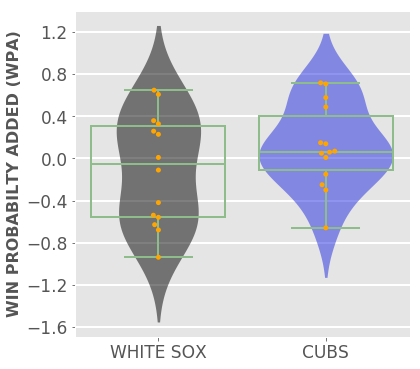

In [19]:
# 
my_pal = {"WHITE SOX": "#000000", "CUBS": "#000FFF"}
gs = sns.violinplot(x="Team", y="WPA", data=h2hpitching, inner=None, linewidth=0, palette=my_pal)
plt.setp(gs.collections, alpha=.5)
g = sns.boxplot(x="Team", y="WPA", data=h2hpitching,  
                showcaps=True, 
                boxprops={'facecolor':'None', 'edgecolor': '#8FBC8B', 'zorder': 1 }, 
                whiskerprops={'color': '#8FBC8B'}, 
                capprops={'color': '#8FBC8B'}, 
                medianprops={'color': '#8FBC8B'}, 
                showfliers=False)
g = sns.swarmplot(x="Team", y="WPA", data=h2hpitching, color="orange")
g.figure.set_size_inches(6,6)
g.grid(axis='y', linewidth=2)
tick_locator = ticker.MaxNLocator(10)
g.yaxis.set_major_locator(tick_locator)
# Add labels to the plot
g.set_xlabel('', fontsize=2)
g.set_ylabel('WIN PROBABILTY ADDED (WPA)', fontsize=16, fontweight='bold')
g.figure.savefig('static/img/h2hWPA.png',bbox_inches='tight')
#g.figure.savefig('static/img/WPA.svg',bbox_inches='tight')


In [20]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#E5E5E5',
 'axes.grid': True,
 'axes.labelcolor': '#555555',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif '],
 'font.sans-serif': ['Verdana, Arial, Helvetica'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'legend.frameon': True,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'projecting',
 'text.color': 'k',
 'xtick.color': '#555555',
 'xtick.direction': 'out',
 'xtick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.color': '#555555',
 'ytick.direction': 'out',
 'ytick.major.size': 3.5,
 'ytick.minor.size': 2.0}

In [ ]:
# The olive lines are the box and whiskers blot, otherwise known as a box plot. 
# Excluding outliers, this chart divides up all the values into quintiles, with the box showing the middle two quinitles.
# So the box should roughly show where 50% of the values lie, with the line inside the box is the median value. 
# Outliers are anything that fall beyond the "whiskers," or the lines shooting out above and below the box.

# On top of that is the violin plot. It's the color area whose where the width represents the number of values
# that fall along that vertical axes. The more values there, the wider the plot is at that point. 
# I'm also using the colors of the plot to quickly identify each team (black = White Sox, blue = Cubs)

# The swarm plot is the orange dots. Basically, all those dots should be on the line, where overlapping dots would be 
# hard to see. A swarm plot simply moves them right or left of the center line so you can see each dot.

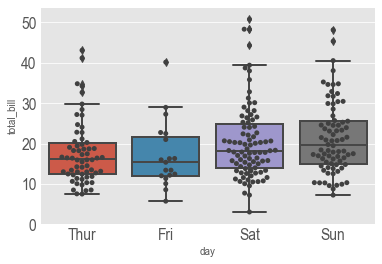

In [7]:

tips = sns.load_dataset("tips")

g = sns.boxplot(x="day", y="total_bill", data=tips)
g = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

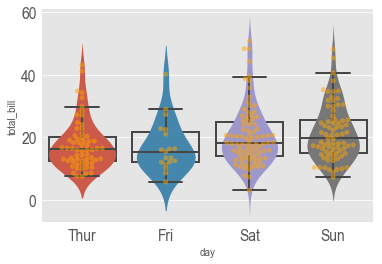

In [44]:
g = sns.boxplot(x="day", y="total_bill", data=tips, 
                showcaps=True, boxprops={'facecolor':'None'}, showfliers=False)
g = sns.swarmplot(x="day", y="total_bill", data=tips, color="orange")
plt.setp(g.collections, alpha=.5)
g = sns.violinplot(x="day", y="total_bill", data=tips, inner=None, linewidth=0)

